<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W9_FRI_31_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist  #mnist là tập dữ liệu chữ số viết tay 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape
### (...28,28): số lượng kích thước ảnh 28x28

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

Số này là:  5


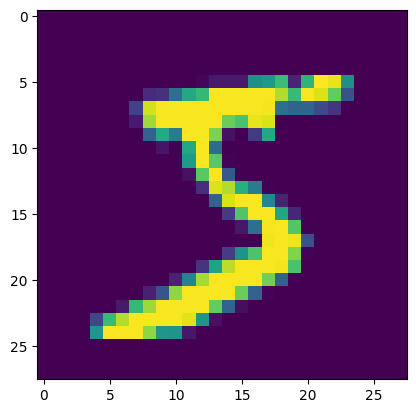

In [ ]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('Số này là: ', train_labels[0])

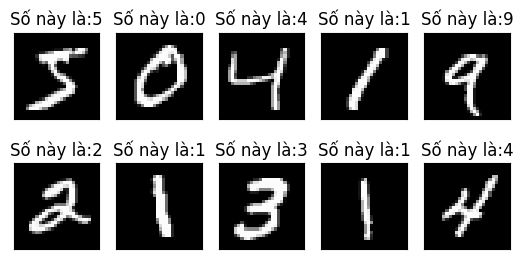

In [ ]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(train_images[i],cmap='gray',
             interpolation='none')
  plt.title('Số này là:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential   #Sequential mô tả ANN theo thuần tự
                                      #các lớp kế tiếp liên tục nhau
from keras.layers import Dense        #Dense=full_connected (sự kết nối đầy đủ)

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
#512 noron là output đồng thời là input nên không cần khai báo nũa
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((60000,28*28))  #chỉnh lại kích thước số dữ liệu đầu vào 
train_images = train_images.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

test_images = test_images.reshape((10000,28*28))  
test_images = test_images.astype('float32')/255

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [ ]:
from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
train_labels = to_categorical(train_labels,10)  #từ 1 bit thành 10 bit
test_labels = to_categorical(test_labels,10)

print(train_labels.shape)

(60000, 10)


In [ ]:
print(test_labels.shape)

(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(train_images,train_labels,epochs=20,batch_size=128)   #20 lần học, mỗi lần học 128 lần ngẫu nhiên
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)
#X = test_images
#Y = test_labels

Epoch 1/20
469/469 [==============================] - 14s 26ms/step - loss: 0.2665 - accuracy: 0.9228
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1089 - accuracy: 0.9680
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0710 - accuracy: 0.9791
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0516 - accuracy: 0.9844
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9891
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0296 - accuracy: 0.9916
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0219 - accuracy: 0.9938
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0168 - accuracy: 0.9954
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0132 - accuracy: 0.9964
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0097 - accuracy: 